In [2]:
from IPython import display
import time

In [3]:
import numpy as np
import random
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def position(board,cor,ori,ship):
    if ori == 'H':
        if (cor[1]-ship)<0 and (cor[1]+ship)>11:
            pass
        elif (cor[1]-ship)<0:
            board[cor[0],cor[1]:cor[1]+ship] = 1
        else:
            board[cor[0],cor[1]-ship:cor[1]] = 1
    else:
        if (cor[0]-ship)<0 and (cor[0]+ship)>11:
            pass
        elif (cor[0]-ship)<0:
            board[cor[0]:cor[0]+ship,cor[1]] = 1
        else:
            board[cor[0]-ship:cor[0],cor[1]] = 1 
    return board

In [6]:
def complete_board(ships):
    tablero = np.zeros((12,12))
    for i in ships:
        while True:
            rc = (random.choice(range(9)),random.choice(range(9)))
            ro = random.choice(['H','V'])
            if ro == 'H' and tablero[rc[0],:].any():
                pass
            elif ro == 'V' and tablero[:,rc[1]].any():
                pass
            else:
                position(tablero,rc,ro,i)
                break
    points = [(np.nonzero(tablero)[0][i],np.nonzero(tablero)[1][i]) for i in range(len(np.nonzero(tablero)[0]))]
    return tablero, points

In [18]:
tablero, points = complete_board([6,4,2])
life = 10
print(points)

[(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (6, 3), (6, 4), (6, 5), (6, 6), (8, 3), (8, 4)]


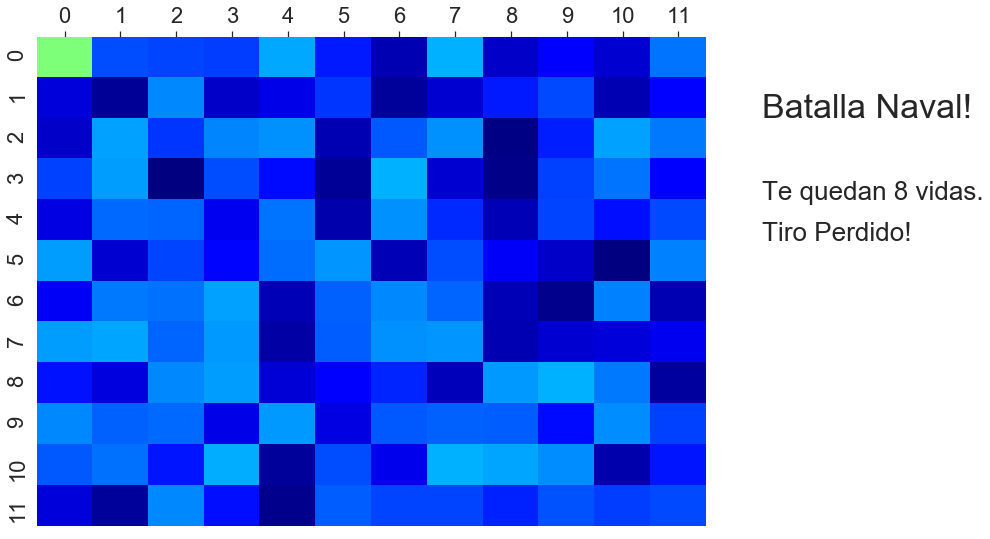

In [ ]:
dummy = np.random.uniform(0,0.3,(12,12))
sns.set(font_scale = 2)
msg = ''

while True: 

    plt.figure(figsize=(12,9))
    sns.heatmap(dummy, cbar=False, cmap='jet',vmin=0,vmax=1).xaxis.tick_top()
    plt.text(13,2,f'Batalla Naval!',fontsize = 34)
    plt.text(13,4,f'Te quedan {life} vidas.',fontsize = 26)
    plt.text(13,5,msg,fontsize = 26)
    display.display(plt.gcf())

    if life == 0:
        display.clear_output(wait=True)
        print('Se te terminaron las vidas!')
        print('Tu pierdes!')
        break
    elif not points:
        display.clear_output(wait=True)
        print('Felicidades, hundiste todos los barcos!')
        print('Tu ganas!')
        break
    
    try:
        x = int(input('Numero de Fila: '))
        y = int(input('Numero de Columna: '))
    except:
        print('Entrada invalida, tiene que introducirse un numero entero entre 0 y 13')
        
    if x == 999:
        display.clear_output(wait=True)
        break
    elif (x,y) in points:
        msg = 'Le diste a un Barco!'
        dummy[x,y] = 1
        points.remove((x,y))
    else:
        msg = 'Tiro Perdido!'
        dummy[x,y] = 0.5
        life -= 1

    display.clear_output(wait=True)

In [ ]:
6
